# Дерево решений, ID3

## Подготовка данных

Набор данных был взят с платформы kaggle, [классификация цены мобильного устройства](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data).

После преобразования итоговый набор содержит 8 столбцов, включая целевой признак (ценовой диапазон), 100 записей, из которых 80 предназначены для обучения дерева решения, 20 для тестирования.

Ниже представлен набор данных.

In [1]:
import data_provider.data_provider as data_provider

In [2]:
train_data = data_provider.get_train_data()
train_data

,Мощность батареи (mAh),Частота процессора (gHz),Число ядер процессора (n),Число мегапикселей (n),Объём встроенной памяти (gb),Объём оперативной памяти (mb),Площадь экрана (cm^2),Ценовой диапазон
0,798.50 - 1151.50,1.60 - 2.32,1.00 - 3.00,0.00 - 7.00,3.00 - 16.75,2209.50 - 3079.00,63.00 - 143.25,2
1,798.50 - 1151.50,0.50 - 0.67,3.00 - 4.00,0.00 - 7.00,50.25 - 64.00,2209.50 - 3079.00,29.50 - 63.00,3
2,509.00 - 798.50,0.50 - 0.67,4.00 - 7.00,7.00 - 14.00,38.50 - 50.25,2209.50 - 3079.00,5.00 - 29.50,3
3,509.00 - 798.50,2.32 - 3.00,4.00 - 7.00,7.00 - 14.00,3.00 - 16.75,2209.50 - 3079.00,63.00 - 143.25,3
4,1613.00 - 1977.00,0.67 - 1.60,1.00 - 3.00,24.00 - 37.00,38.50 - 50.25,1321.50 - 2209.50,5.00 - 29.50,2
...,...,...,...,...,...,...,...,...
75,798.50 - 1151.50,0.67 - 1.60,3.00 - 4.00,24.00 - 37.00,50.25 - 64.00,1321.50 - 2209.50,29.50 - 63.00,2
76,798.50 - 1151.50,2.32 - 3.00,1.00 - 3.00,14.00 - 24.00,50.25 - 64.00,1321.50 - 2209.50,29.50 - 63.00,2
77,1151.50 - 1613.00,2.32 - 3.00,7.00 - 8.00,14.00 - 24.00,16.75 - 38.50,349.00 - 1321.50,63.00 - 143.25,2
78,798.50 - 1151.50,2.32 - 3.00,3.00 - 4.00,7.00 - 14.00,50.25 - 64.00,3079.00 - 3993.00,29.50 - 63.00,4


Изначально все признаки имели числовые значения, но алгоритм ID3 требует, чтобы значения были категориальными, поэтому все признаки были переведены в диапазоны. Всего диапазонов 4 для каждого признака, они подобраны таким образом, чтобы в каждый диапазон входило примерно 25% значений признака.

Ценовой диапазон в оригинальном наборе данных изначально имел всего 4 значения.

In [3]:
data_provider.print_unique_column_values()

Мощность батареи (mAh)
['509.00 - 798.50',
 '798.50 - 1151.50',
 '1151.50 - 1613.00',
 '1613.00 - 1977.00']

Частота процессора (gHz)
['0.50 - 0.67', '0.67 - 1.60', '1.60 - 2.32', '2.32 - 3.00']

Число ядер процессора (n)
['1.00 - 3.00', '3.00 - 4.00', '4.00 - 7.00', '7.00 - 8.00']

Число мегапикселей (n)
['0.00 - 7.00', '7.00 - 14.00', '14.00 - 24.00', '24.00 - 37.00']

Объём встроенной памяти (gb)
['3.00 - 16.75', '16.75 - 38.50', '38.50 - 50.25', '50.25 - 64.00']

Объём оперативной памяти (mb)
['349.00 - 1321.50',
 '1321.50 - 2209.50',
 '2209.50 - 3079.00',
 '3079.00 - 3993.00']

Площадь экрана (cm^2)
['5.00 - 29.50', '29.50 - 63.00', '63.00 - 143.25', '143.25 - 323.00']

Ценовой диапазон
['1', '2', '3', '4']



## Построение дерева решений

In [4]:
from decision_tree.decision_tree_id3 import id3
from IPython.display import Image

In [5]:
tree = id3(train_data, 'Ценовой диапазон')

In [6]:
digraph = tree.get_digraph()
digraph.render('digraph/tree')

'digraph\\tree.png'

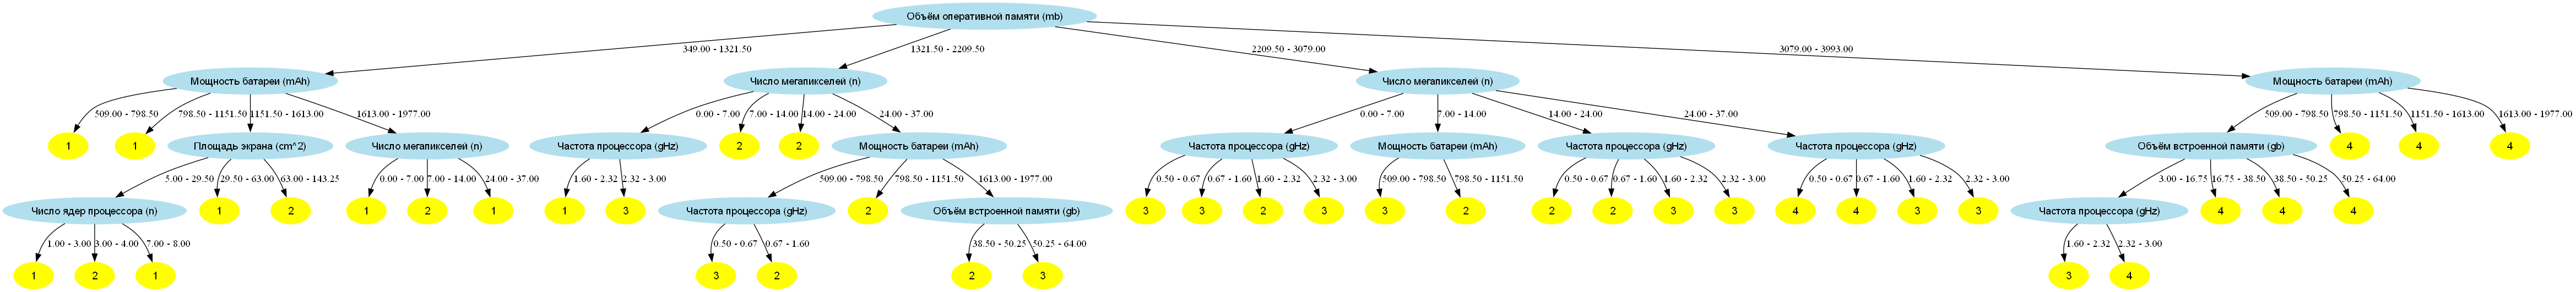

In [7]:
display(Image('digraph/tree.png'))

Дерево получилось чересчур широким для просмотра.

[Здесь](https://drive.google.com/file/d/1KHRMkt_ldrPl9fP6GqzIBzJtO9nXwrcz/view?usp=sharing) удобнее просматривать, можно приближать и перемещать.

In [8]:
leaf_number = tree.get_leaf_number()
max_leaf_number = train_data.shape[0]

print(f'Число вершин-листьев - {leaf_number}.')
print(f'Максимальное дерево содержит вершин-листьев (число строк в таблице) - {max_leaf_number}.')
print(f'Эффективность сжатия - {(max_leaf_number - leaf_number) / max_leaf_number * 100}%.')

Число вершин-листьев - 41.
Максимальное дерево содержит вершин-листьев (число строк в таблице) - 80.
Эффективность сжатия - 48.75%.


## Тестирование дерева решений

In [9]:
from decision_tree.decision_tree_test import test_decision_tree

Проверим дерево решений на какой-нибудь записи, которое участвовало в его построении.

In [10]:
record = dict(train_data.iloc[10])
record

{'Мощность батареи (mAh)': '509.00 - 798.50',
 'Частота процессора (gHz)': '2.32 - 3.00',
 'Число ядер процессора (n)': '4.00 - 7.00',
 'Число мегапикселей (n)': '0.00 - 7.00',
 'Объём встроенной памяти (gb)': '3.00 - 16.75',
 'Объём оперативной памяти (mb)': '3079.00 - 3993.00',
 'Площадь экрана (cm^2)': '5.00 - 29.50',
 'Ценовой диапазон': '4'}

In [11]:
tree.predict(record)

'4'

Дерево верно предсказало, но здесь у неё не было никакого права на ошибку.

Теперь протестируем на записях, которые не участвовали в построении дерева.

In [12]:
test_data = data_provider.get_test_data()

tests = test_data.shape[0]
accept_tests, undefineds = test_decision_tree(tree, test_data, 'Ценовой диапазон')

In [13]:
print(f'Число пройденных тестов - {accept_tests}/{tests}.')
print(f'Число неопределённых тестов - {undefineds}.')
print(f'Точность модели - {"{:.2f}".format(accept_tests / tests * 100)}%.')

Число пройденных тестов - 8/20.
Число неопределённых тестов - 2.
Точность модели - 40.00%.


Неопределённые тесты это такие тесты, на которые дерево не смогло дать никакого ответа. То есть попалась комбинация значений признаков, которых не было в обучающей выборке.